## Manzano, Romulo

# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

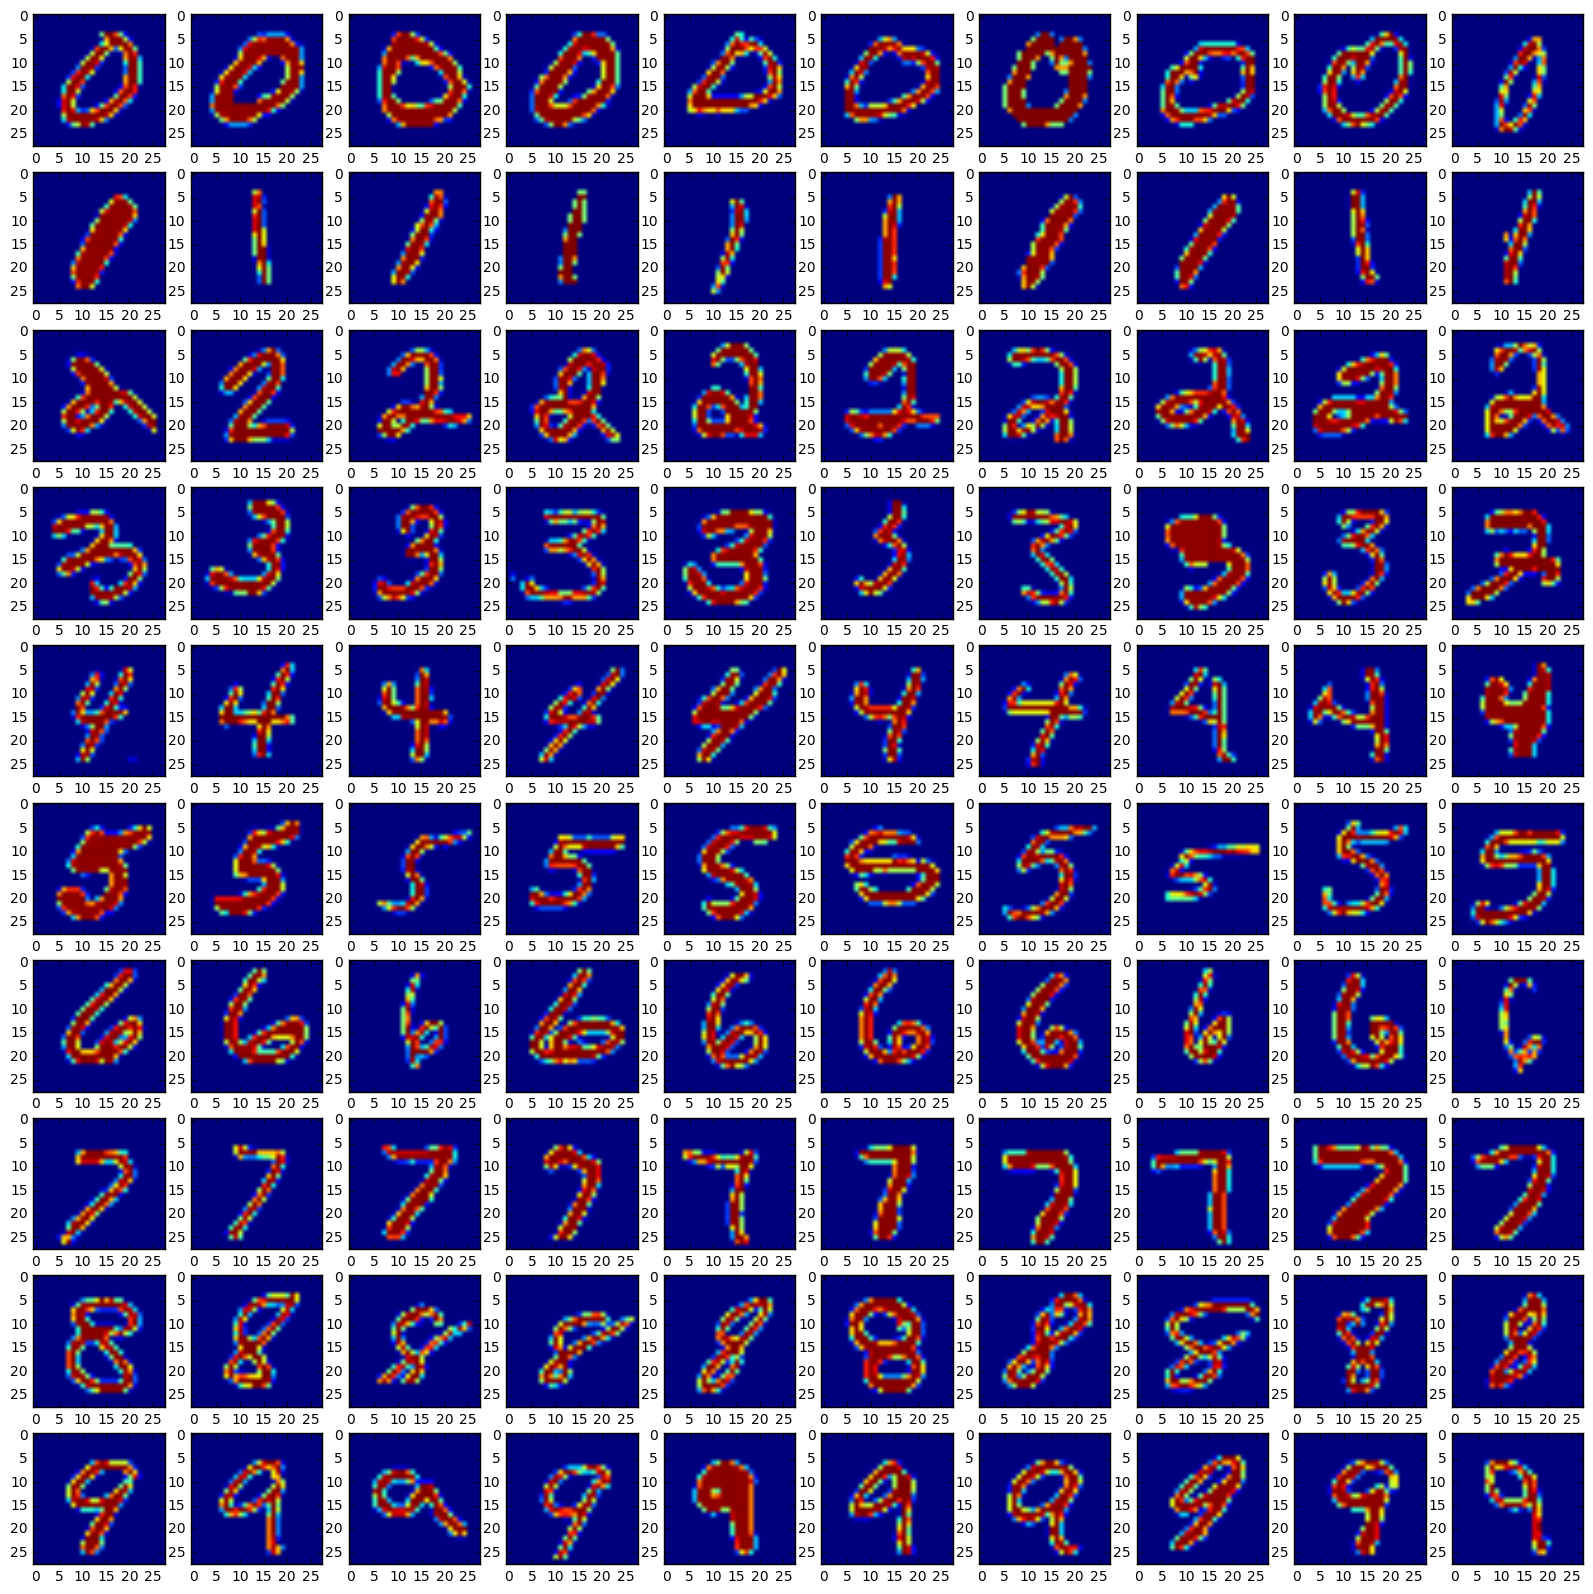

In [4]:
def P1(num_examples=10):
    plt.figure(figsize=(20,20))
    n_digits = 10
    for i in range(n_digits):
        examples = mini_train_data[mini_train_labels==i]
        tbplot = np.random.choice(examples.shape[0],size=num_examples,replace=False)
        for j in range(num_examples):
            plt.subplot(10,n_digits,j+1 +(i*n_digits))
            plt.imshow(examples[tbplot[j],].reshape((28,28)))
            
P1()

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
def P2(k_values):
    for i in k_values:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(mini_train_data,mini_train_labels)
        knn_prediction = knn.predict(dev_data)
        print("Results with K = ", i)
        print("k=", i, "; accuracy:", np.mean(dev_labels == knn_prediction))
        if(i == 1):
            print(classification_report(dev_labels,knn_prediction))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Results with K =  1
k= 1 ; accuracy: 0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Results with K =  3
k= 3 ; accuracy: 0.878
Results with K =  5
k= 5 ; accuracy: 0.869
Results with K =  7
k= 7 ; accuracy: 0.865
Results with K =  9
k= 9 ; accuracy: 0.863


ANSWER: Digit 9 seems to be the most difficult digit, evidenced by a low score in both precision and recall (hence a low F1 score)

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [6]:
def P3(train_sizes,accuracies):
    for i in train_sizes:
        random_sample = np.random.choice(60000,size=i,replace=False)
        t_data,t_labels = train_data[random_sample,],train_labels[random_sample,]
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(t_data,t_labels)
        t = time.time()
        knn_prediction = knn.predict(dev_data)
        t = time.time() -t
        print("Results with train size = ", i)
        accuracies.append(np.mean(dev_labels == knn_prediction))
        print("Train Size=", i, "; accuracy:", np.mean(dev_labels == knn_prediction))
        print("Seconds to predict: ", t)
        
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes,accuracies)

Results with train size =  100
Train Size= 100 ; accuracy: 0.626
Seconds to predict:  0.11860346794128418
Results with train size =  200
Train Size= 200 ; accuracy: 0.767
Seconds to predict:  0.36876392364501953
Results with train size =  400
Train Size= 400 ; accuracy: 0.832
Seconds to predict:  0.6169359683990479
Results with train size =  800
Train Size= 800 ; accuracy: 0.86
Seconds to predict:  1.2468693256378174
Results with train size =  1600
Train Size= 1600 ; accuracy: 0.905
Seconds to predict:  2.107980489730835
Results with train size =  3200
Train Size= 3200 ; accuracy: 0.927
Seconds to predict:  4.552217721939087
Results with train size =  6400
Train Size= 6400 ; accuracy: 0.943
Seconds to predict:  8.807760953903198
Results with train size =  12800
Train Size= 12800 ; accuracy: 0.958
Seconds to predict:  16.873513221740723
Results with train size =  25000
Train Size= 25000 ; accuracy: 0.97
Seconds to predict:  31.592976093292236


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [7]:
def P4(predict_size,train_sizes,accuracies):
    lr = LinearRegression()
    t_s = (np.asarray(train_sizes)).reshape((len(accuracies),1))
    t_a = (np.asarray(accuracies)).reshape((len(accuracies),1))
    lr.fit(t_s,t_a)
    predict_accuracy = lr.predict(predict_size)
    return(predict_accuracy)

print("Predicted accuracy for 60k train size ", P4(60000,train_sizes,accuracies))

Predicted accuracy for 60k train size  [[ 1.30226575]]


ANSWER: The problem with fitting a linear regression is that we're regressing accuracy, which is naturally capped at 1.0 (100%). Furthermore, the effect of train size as a regressor diminishes as it grows (effect decreases as it grows), so a couple of transformations can be applied. First, we can introduce the size squared as an additional feature, this way the regression will assign a negative beta to the squared feature, signalling the decreasing effect on accuracy. Similarly, we could regress the percentage increase in accuracy instead (log of accuracy as the dependent variable), or the increase in accuracy due to a percentage increase in train size (log transform the regressor)

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) *100.0
        print("Normalized confusion matrix (in %)")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range(cm.shape[0]):
         for j in range(cm.shape[1]):
            if normalize:
                plt.text(j, i, "%.0f" % cm[i, j],
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, cm[i, j],
                            horizontalalignment="center",
                             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


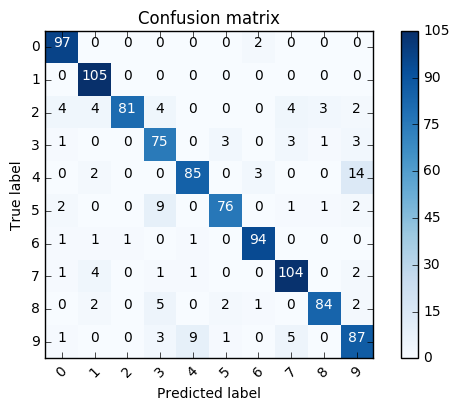

In [9]:
def P5():
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data,mini_train_labels)
    knn_prediction = knn.predict(dev_data)
    return confusion_matrix(dev_labels,knn_prediction,labels = range(10))
    
cf_mtx = P5()
plot_confusion_matrix(cf_mtx,range(10))

Normalized confusion matrix (in %)


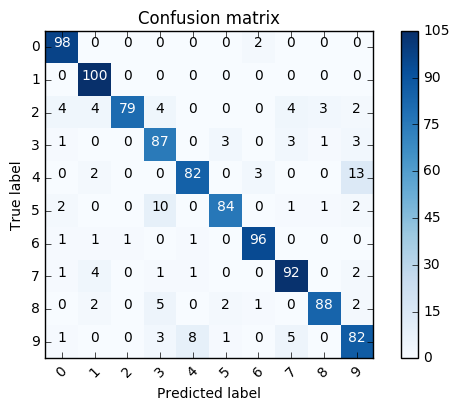

In [10]:
plot_confusion_matrix(cf_mtx,range(10),normalize = True)

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [11]:
def weightedBlur(pixel,item,size=28):
    '''size = 28
    pixel = 93
    item = test
    '''
    bound = size*size
    weightedVal = []
    #self = 
    wt = 1.0
    totalWeight = wt
    weightedVal.append(item[pixel]*wt)

    #upper = 
    upper_x = pixel-size
    if(upper_x >= 0):
        wt = 0.66
        totalWeight += wt
        weightedVal.append(item[upper_x]*wt)
    #lower = 
    lower_x = pixel+size
    if(lower_x < size*size):
        wt = 0.66
        totalWeight += wt
        weightedVal.append(item[lower_x]*wt)

    #right = 
    right_x = pixel+1
    if((right_x%size > pixel%size) & (right_x < bound)):
        wt = 0.66
        totalWeight += wt
        weightedVal.append(item[right_x]*wt)
        
    #left = 
    left_x = pixel-1
    if(left_x%size < pixel%size):
        wt = 0.66
        totalWeight += wt
        weightedVal.append(item[left_x]*wt)
        
    #upper_right = 
    upper_right_x = pixel-size+1
    if((upper_right_x >= 0) & (upper_right_x%size > pixel%size)):
        wt = 0.33
        totalWeight += wt
        weightedVal.append(item[upper_right_x]*wt)
        
    #lower_right = 
    lower_right_x = pixel+size+1
    if((lower_right_x < bound) & (lower_right_x%size > pixel%size)):
        wt = 0.33
        totalWeight += wt
        weightedVal.append(item[lower_right_x]*wt)
        
    #upper_left = 
    upper_left_x = pixel-size-1
    if((upper_left_x >= 0) & (upper_left_x%size < pixel%size)):
        wt = 0.33
        totalWeight += wt
        weightedVal.append(item[upper_left_x]*wt)
        
    #lower_left = 
    lower_left_x = pixel+size-1
    if((lower_left_x < bound) & (lower_left_x%size < pixel%size)):
        wt = 0.33
        totalWeight += wt
        weightedVal.append(item[lower_left_x]*wt)
    
    val = sum(weightedVal)/totalWeight
    return val
        
    
def blur(item):
    blur = []
    for x in range(item.shape[0]):
        blur.append(weightedBlur(x,item))
        
    return np.asarray(blur)

def test_Blur(b_train_data,b_dev_data, k =1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(b_train_data,mini_train_labels)
    knn_prediction = knn.predict(b_dev_data)
    print("Results with K = ", k)
    print("k=", k, "; accuracy:", np.mean(dev_labels == knn_prediction))

Case 1: preprocess the training data but not the dev data

In [12]:
blur_mini_train_data = np.apply_along_axis(blur,1,mini_train_data)
blur_dev_data = np.apply_along_axis(blur,1,dev_data)

In [13]:
test_Blur(blur_mini_train_data,dev_data)

Results with K =  1
k= 1 ; accuracy: 0.905


preprocess the dev data but not the training data

In [14]:
test_Blur(mini_train_data,blur_dev_data)

Results with K =  1
k= 1 ; accuracy: 0.874


preprocess both training and dev data

In [15]:
test_Blur(blur_mini_train_data,blur_dev_data)

Results with K =  1
k= 1 ; accuracy: 0.901


We seem to get drastic improvements on the K=1 classifiers. The most noticeable increase comes when blurring on the training set

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [16]:
def bernoulli_Test(blur_th):
    for t in blur_th:
        nb = BernoulliNB(binarize = t)
        nb.fit(mini_train_data,mini_train_labels)
        nb_prediction = nb.predict(dev_data)
        print("Results with binarize threshold of  = ", t)
        print("Threshold=", t, "; accuracy:", np.mean(dev_labels == nb_prediction))

In [17]:
thresholds = [0.2,0.3,0.4,0.5,0.6,0.7]
bernoulli_Test(thresholds)

Results with binarize threshold of  =  0.2
Threshold= 0.2 ; accuracy: 0.821
Results with binarize threshold of  =  0.3
Threshold= 0.3 ; accuracy: 0.818
Results with binarize threshold of  =  0.4
Threshold= 0.4 ; accuracy: 0.818
Results with binarize threshold of  =  0.5
Threshold= 0.5 ; accuracy: 0.815
Results with binarize threshold of  =  0.6
Threshold= 0.6 ; accuracy: 0.813
Results with binarize threshold of  =  0.7
Threshold= 0.7 ; accuracy: 0.802


In [18]:
def wgb_class(data,t):
    for x in range(data.shape[0]):
        for y in range(data.shape[1]):
            if(data[x,y]<= t[0]):
                data[x,y] = 0
            else:
                if(data[x,y]<=t[1]):
                    data[x,y]= 1
                else:
                    data[x,y]= 2
    return data


def multinomial_Test(thresholds):
    for t in thresholds:
        b_train_data = wgb_class(mini_train_data,t)
        b_dev_data = wgb_class(dev_data,t)
        nb = MultinomialNB()
        nb.fit(b_train_data,mini_train_labels)
        nb_prediction = nb.predict(b_dev_data)
        print("Results with w,g,b thresholds of  = ", t)
        print("Accuracy:", np.mean(dev_labels == nb_prediction))

In [19]:
th = [[0.33,0.66,1.00],[0.10,0.50,1.00],[0.01,0.40,1.00]]
multinomial_Test(th)

Results with w,g,b thresholds of  =  [0.33, 0.66, 1.0]
Accuracy: 0.802
Results with w,g,b thresholds of  =  [0.1, 0.5, 1.0]
Accuracy: 0.802
Results with w,g,b thresholds of  =  [0.01, 0.4, 1.0]
Accuracy: 0.802


ANSWER: MultinomialDB does represent an improvement (as compared to the BernoulliNB approach). We can assert that this is due to the fact the intensity of the pixel does not play a significant role after certain threshold- meaning, there is no much value in differentiating between grey/black, as both mean the pixel is part of the digit construct

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [22]:
def P8(alphas,t=0.2):
    nb = BernoulliNB(binarize = t)
    gs = GridSearchCV(nb,alphas)
    gs.fit(mini_train_data,mini_train_labels)
    return gs

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
b = P8(alphas)

C:\Users\romulo\AppData\Roaming\Python\Python35\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\romulo\AppData\Roaming\Python\Python35\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\romulo\AppData\Roaming\Python\Python35\site-packages\sklearn\naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\romulo\AppData\Roaming\Python\Python35\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


In [23]:
print(b.best_params_)
b.grid_scores_

{'alpha': 0.001}


[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0},
 mean: 0.82400, std: 0.01626, params: {'alpha': 0.0001},
 mean: 0.82500, std: 0.01531, params: {'alpha': 0.001},
 mean: 0.82500, std: 0.01507, params: {'alpha': 0.01},
 mean: 0.82000, std: 0.01903, params: {'alpha': 0.1},
 mean: 0.81400, std: 0.01236, params: {'alpha': 0.5},
 mean: 0.80700, std: 0.00717, params: {'alpha': 1.0},
 mean: 0.79900, std: 0.01046, params: {'alpha': 2.0},
 mean: 0.73900, std: 0.01789, params: {'alpha': 10.0}]

ANSWER: Best value of alpha is 0.001. It seems logical for alpha 0.0 (no smoothing) to have lower score, given that we can't be completely sure the train set provides a true representation of the posterior distributions.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [51]:
def binarize_class(data,t = 0.1):
    for x in range(data.shape[0]):
        for y in range(data.shape[1]):
            if(data[x,y]<= t):
                data[x,y] = 0
            else:
                data[x,y] = 1
            
    return data

def Gaussian_Test(binarize=False):
    #sample_wt = np.random.RandomState(42).rand(mini_train_labels.shape[0])
    nb = GaussianNB()
    if(blur):
        nb.fit(binarize_class(mini_train_data),mini_train_labels)
        nb_prediction = nb.predict(binarize_class(dev_data))
    else:
        nb.fit(mini_train_data,mini_train_labels)
        nb_prediction = nb.predict(dev_data)
    print("Accuracy:", np.mean(dev_labels == nb_prediction))
    return nb

In [84]:
gaussian = Gaussian_Test()

Accuracy: 0.637


In [105]:
improved_gaus = Gaussian_Test()
improved_gaus.sigma_ =  improved_gaus.sigma_ +0.02
gaus_prediction = improved_gaus.predict(dev_data)
print("Improved accuracy:", np.mean(dev_labels == gaus_prediction))

Accuracy: 0.637
Improved accuracy: 0.797


ANSWER: The solution consists in increasing the standard deviation of the posterior distribution estimated during training. This is a similar effect to what we observed in Bernoulli with no smoothing, basically we can make our model adapt fit better to new data by giving room for unobserved events as part of the posteriors.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

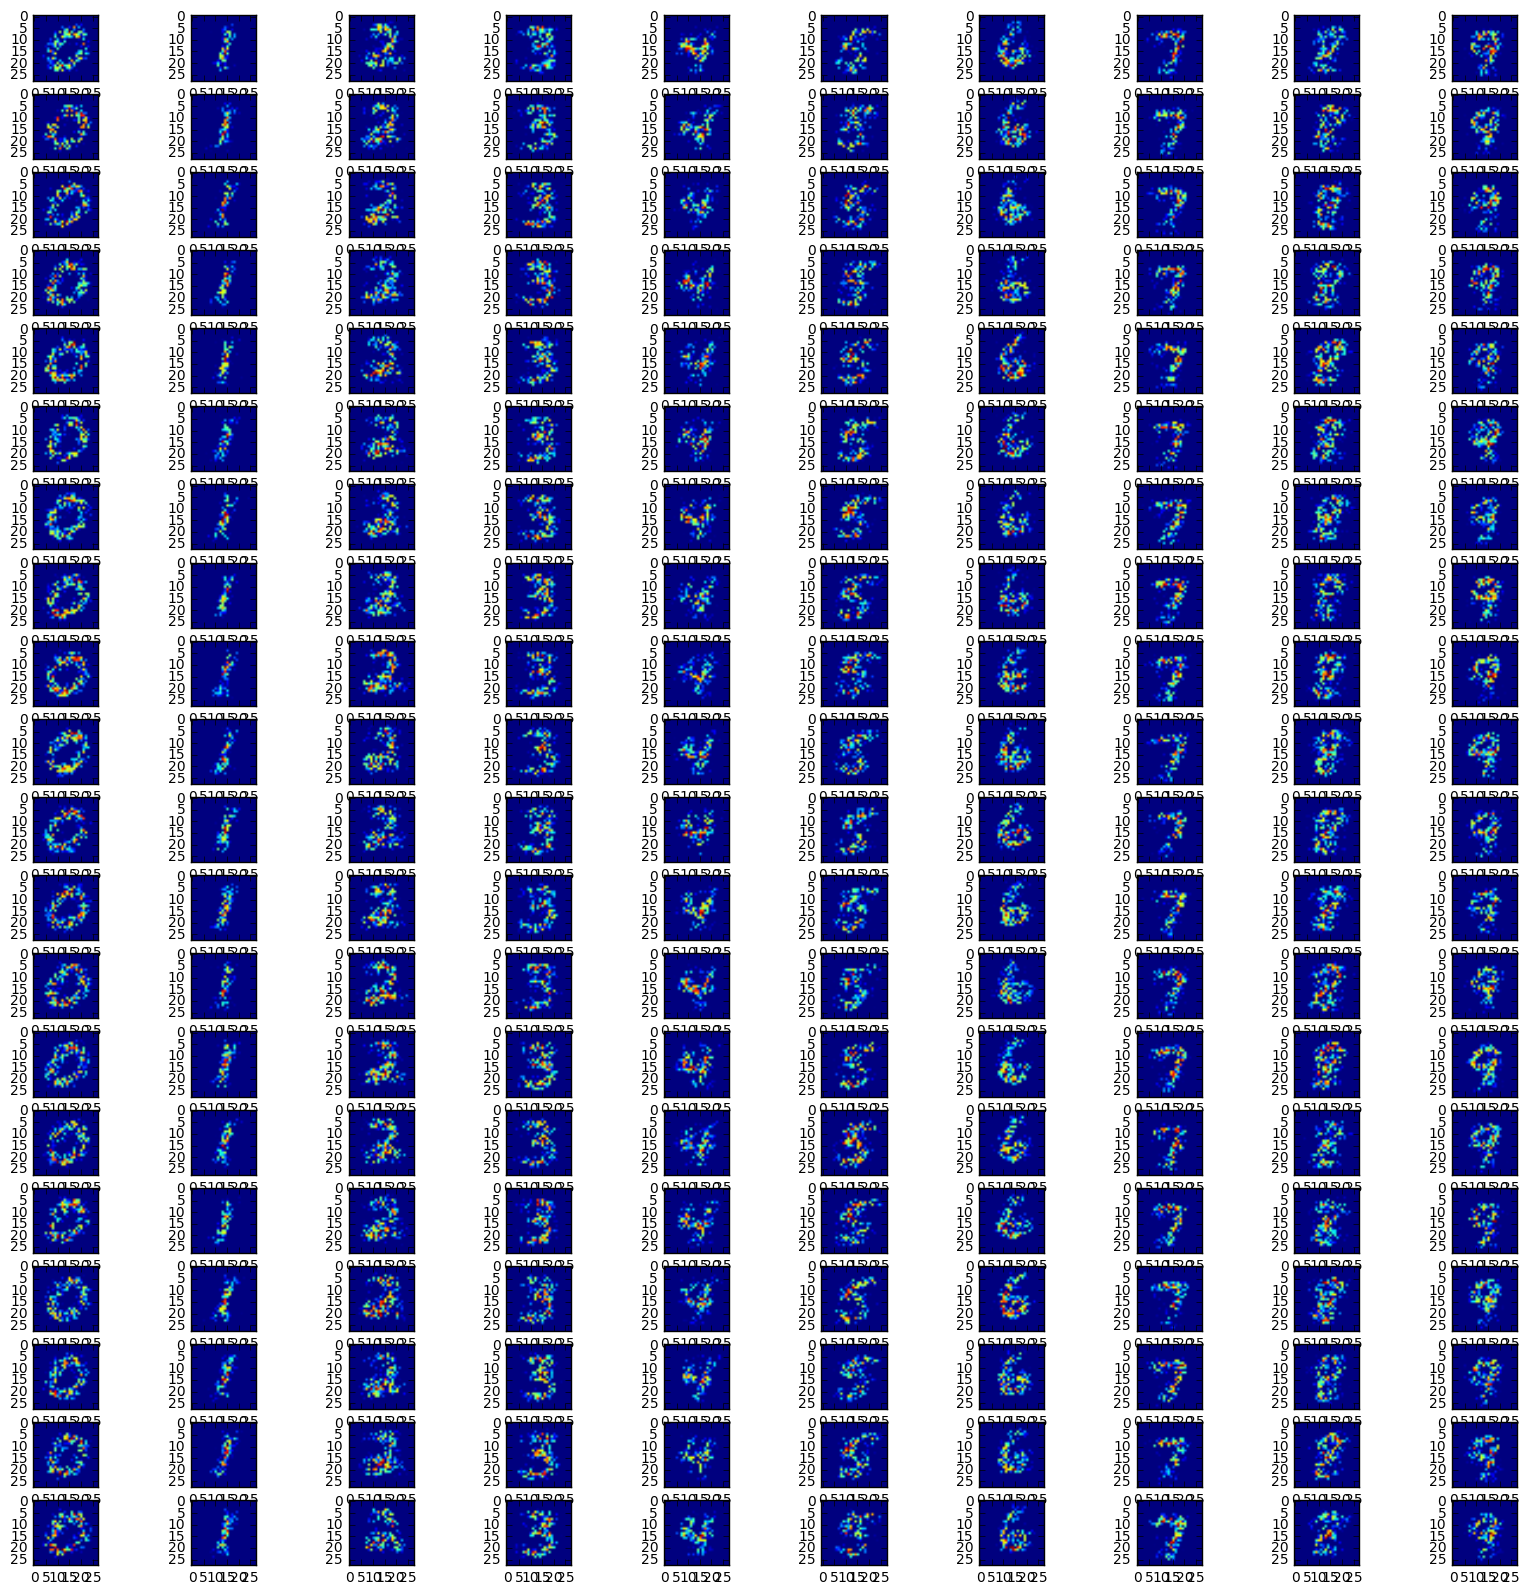

In [138]:
def P10(num_examples=20):
    nb = BernoulliNB(alpha=0.0001,binarize = 0.4)
    nb.fit(mini_train_data,mini_train_labels)
    p = nb.feature_log_prob_
    prob = np.exp(p)
    plt.figure(figsize=(20,20))
    n_digits = 10
    for i in range(num_examples):
        ran = np.random.rand(10,784)
        resu = (ran<=prob)*ran
        for j in range(n_digits):
            plt.subplot(num_examples,n_digits,j+1 +(i*n_digits))
            plt.imshow(resu[j,].reshape((28,28)))
            
P10()

ANSWER: Results seem to align with the training set examples. We can observe that the posterior probabilities allow for a clear representation of digits 0,1,6 (generally subject to high scores in confusion matrix). Conversely, 4,8 and 9 seem to have less concise boundaries

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [143]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def P11(buckets, correct, total):
        nb = BernoulliNB(alpha=1.0,binarize = 0.4)
        nb.fit(mini_train_data,mini_train_labels)
        proba = nb.predict_proba(dev_data)
        prediction = np.apply_along_axis(np.argmax,1,proba)
        max_prob = np.apply_along_axis(max,1,proba)
        bucket = np.asarray([find_nearest(buckets,x) for x in max_prob])
        for i in range(len(buckets)):
            total[i] = (bucket==(buckets[i])).sum()
            cor = (prediction == dev_labels)
            correct[i] = (cor[(bucket==(buckets[i]))]).sum()

        

buckets = [0.5,0.7,0.8, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = (correct[i] / total[i])
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   7    accuracy = 0.429
p(pred) <= 0.7000000000000    total =  11    accuracy = 0.455
p(pred) <= 0.8000000000000    total =   5    accuracy = 0.200
p(pred) <= 0.9000000000000    total =  29    accuracy = 0.345
p(pred) <= 0.9990000000000    total =  82    accuracy = 0.463
p(pred) <= 0.9999900000000    total =  85    accuracy = 0.612
p(pred) <= 0.9999999000000    total =  73    accuracy = 0.685
p(pred) <= 0.9999999990000    total =  76    accuracy = 0.882
p(pred) <= 0.9999999999900    total =  71    accuracy = 0.831
p(pred) <= 0.9999999999999    total =  69    accuracy = 0.855
p(pred) <= 1.0000000000000    total = 492    accuracy = 0.963


ANSWER: Based on the evidence shown above, this could be considered a poorly calibrated classifier as there is little correlation between the accuracy and posterior.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()